<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-03-02 09:54:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  66.4MB/s    in 2.3s    

2025-03-02 09:54:09 (66.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [30]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn
!pip install numpy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [13]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


COUNT(*)
0     65437

## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


Table_Name
0       main

## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568

## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [22]:
df['CompTotal'].value_counts()

CompTotal
100000.0    939
60000.0     839
120000.0    793
80000.0     728
50000.0     705
           ... 
201600.0      1
1100.0        1
133600.0      1
301210.0      1
81920.0       1
Name: count, Length: 3337, dtype: int64

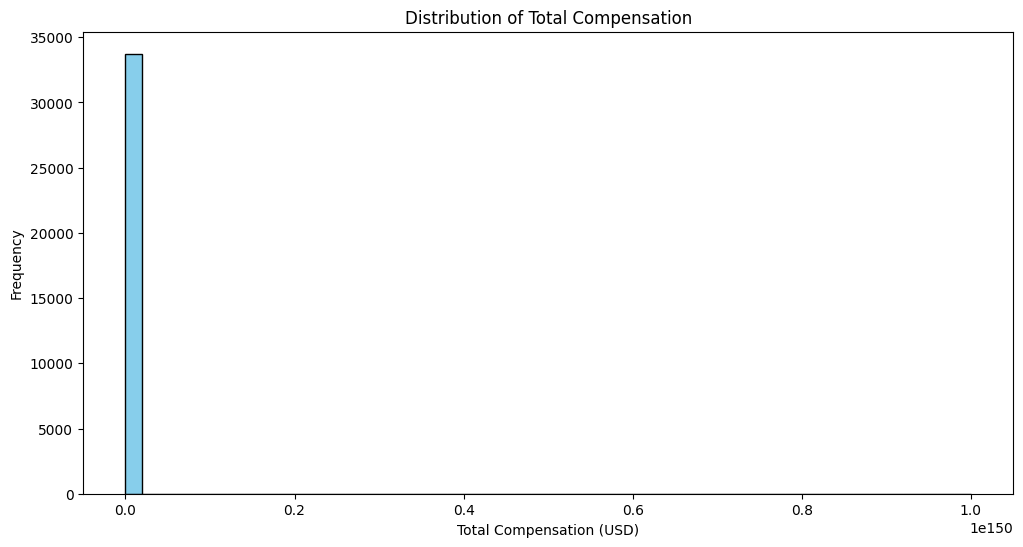

In [26]:



# Plot the histogram for 'CompTotal' using Matplotlib
plt.figure(figsize=(12, 6))

# Plot histogram
plt.hist(df['CompTotal'], bins=50, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Compensation')

# Show the plot
plt.show()



**Box Plots**

Plot a box plot of Age.


In [31]:
import numpy as np

# Define age mapping
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old ': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': np.nan  # Assign NaN initially
}

# Map age categories to numeric values
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Calculate the mean age (excluding NaN)
mean_age = df['AgeNumeric'].mean()

# Replace NaN (from "Prefer not to say") with the calculated mean
df['AgeNumeric'].fillna(mean_age, inplace=True)


# Select only numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

df.head()

/tmp/ipykernel_300/3578007638.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AgeNumeric'].fillna(mean_age, inplace=True)


ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_7  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_8 JobSatPoints_9 JobSatPoints_10 JobSatPoints_11  \
0            NaN            NaN             NaN             NaN   
1            0.0            0.0             0.0             0.0   
2            NaN            NaN             NaN             NaN   
3            NaN            NaN             NaN             NaN   
4            NaN            NaN             NaN             NaN   

            SurveyLength SurveyEase ConvertedCompYearly JobSat AgeNumeric  
0                    NaN        NaN                 NaN    NaN  16.000000  
1                    NaN        NaN                 NaN    NaN  39.000000  
2  Appropriate in length       Easy                 NaN    NaN  49.000000  
3               Too long       Easy                 NaN    NaN  35.858851  
4              Too short       Easy                 NaN    NaN  35.858851  

[5 rows x 115 columns]

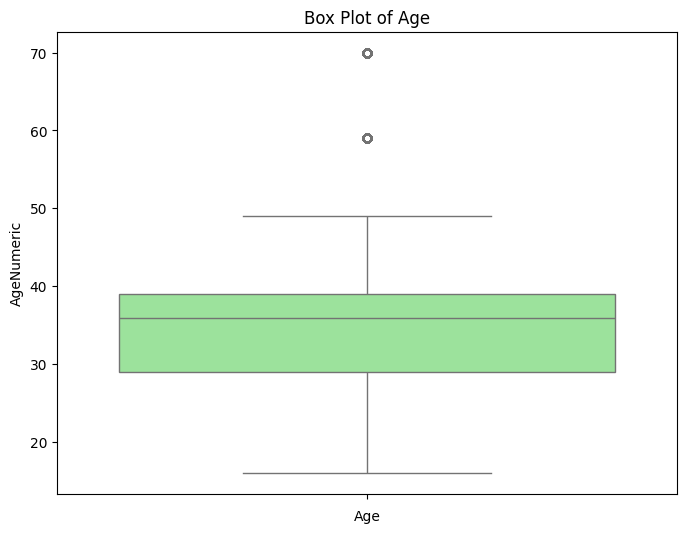

In [32]:


# Plot the box plot for 'Age' using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['AgeNumeric'], color='lightgreen')

# Add labels and title
plt.xlabel('Age')
plt.title('Box Plot of Age')

# Show the plot
plt.show()


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


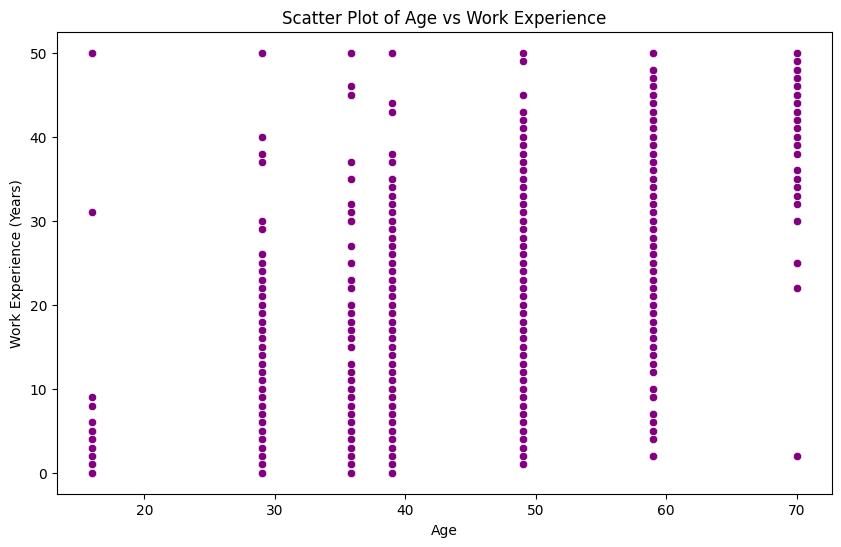

In [33]:
# Scatter plot of Age vs WorkExp
plt.figure(figsize=(10, 6))

# Use Seaborn to create the scatter plot
sns.scatterplot(x='AgeNumeric', y='WorkExp', data=df, color='purple')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Work Experience (Years)')
plt.title('Scatter Plot of Age vs Work Experience')

# Show the plot
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [38]:
df['AgeNumeric'].value_counts()

AgeNumeric
29.000000    23911
39.000000    14942
35.858851    14420
49.000000     6249
59.000000     2575
16.000000     2568
70.000000      772
Name: count, dtype: int64

In [49]:
# Create a bubble plot of TimeSearching vs Frustration with Age as the bubble size


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


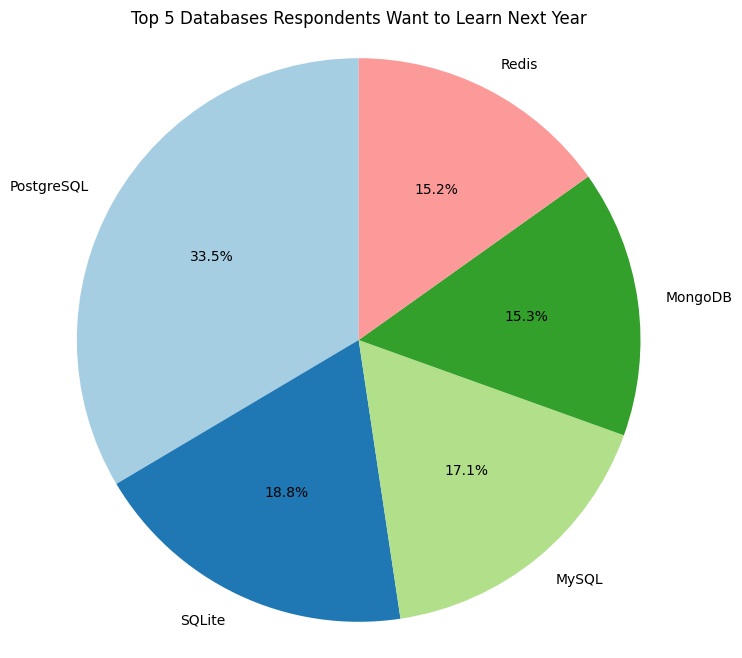

In [52]:
# Step 1: Split the values in 'DatabaseWantToWorkWith' by semicolons
databases = df['DatabaseWantToWorkWith'].dropna().str.split(';', expand=True).stack()

# Step 2: Count the occurrences of each database
database_counts = databases.value_counts()

# Step 3: Select the top 5 databases
top_5_databases = database_counts.head(5)

# Step 4: Plot a pie chart of the top 5 databases
plt.figure(figsize=(8, 8))
plt.pie(top_5_databases, labels=top_5_databases.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Databases Respondents Want to Learn Next Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


Median Time Searching: 45.0
Median Time Answering: 22.5


/tmp/ipykernel_300/1923014468.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['TimeSearchingNumeric'] = df_filtered['TimeSearching'].map(time_mapping)
/tmp/ipykernel_300/1923014468.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['TimeAnsweringNumeric'] = df_filtered['TimeAnswering'].map(time_mapping)
/tmp/ipykernel_300/1923014468.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behav

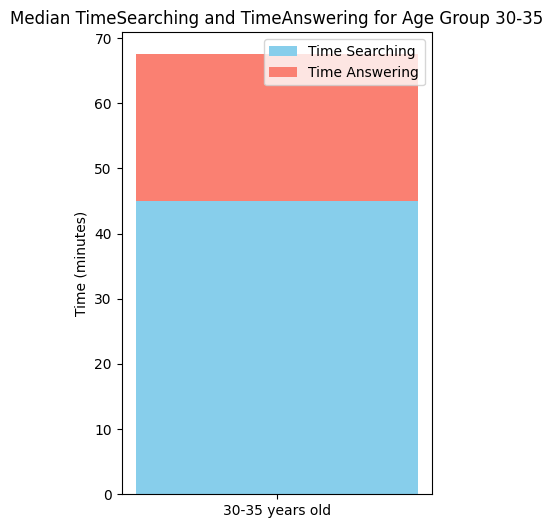

In [72]:

# Filter data for the age group 25-34 years old (which includes 30-35)
df_filtered = df[df['Age'] == '25-34 years old']

# Map TimeSearching and TimeAnswering categories to numeric values (in minutes)
time_mapping = {
    'Less than 15 minutes a day': 7.5,  # Midpoint for "Less than 15 minutes"
    '15-30 minutes a day': 22.5,        # Midpoint for "15-30 minutes"
    '30-60 minutes a day': 45,          # Midpoint for "30-60 minutes"
    '60-120 minutes a day': 90,         # Midpoint for "60-120 minutes"
    'Over 120 minutes a day': 150       # Midpoint for "Over 120 minutes"
}

# Map the TimeSearching and TimeAnswering columns to numeric values
df_filtered['TimeSearchingNumeric'] = df_filtered['TimeSearching'].map(time_mapping)
df_filtered['TimeAnsweringNumeric'] = df_filtered['TimeAnswering'].map(time_mapping)

# Fill NaN values in 'TimeSearching' and 'TimeAnswering' with the median of the respective columns
df_filtered['TimeSearchingNumeric'].fillna(df_filtered['TimeSearchingNumeric'].median(),inplace=True)
df_filtered['TimeAnsweringNumeric'].fillna(df_filtered['TimeAnsweringNumeric'].median(),inplace=True)

# Calculate the median for both TimeSearching and TimeAnswering
median_time_searching = df_filtered['TimeSearchingNumeric'].median()
median_time_answering = df_filtered['TimeAnsweringNumeric'].median()

print("Median Time Searching:", median_time_searching)
print("Median Time Answering:", median_time_answering)

# Prepare data for the stacked bar chart
medians = [median_time_searching, median_time_answering]

# Create a stacked bar chart
fig, ay = plt.subplots(figsize=(4, 6))

# Plot the TimeSearching bar
ay.bar(['30-35 years old'], medians[0], color='skyblue', label='Time Searching')

# Plot the TimeAnswering bar stacked on top of TimeSearching
ay.bar(['30-35 years old'], medians[1], bottom=medians[0], color='salmon', label='Time Answering')

# Add labels and title
ay.set_ylabel('Time (minutes)')
ay.set_title('Median TimeSearching and TimeAnswering for Age Group 30-35')

# Add legend
ay.legend(['Time Searching', 'Time Answering'])

plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


Median Comp_Total: 131000.0


/tmp/ipykernel_300/4256892168.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered['CompTotal'].fillna(median_comp_total, inplace=True)
/tmp/ipykernel_300/4256892168.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CompTotal'].fillna(median_comp_total, inplace=True)


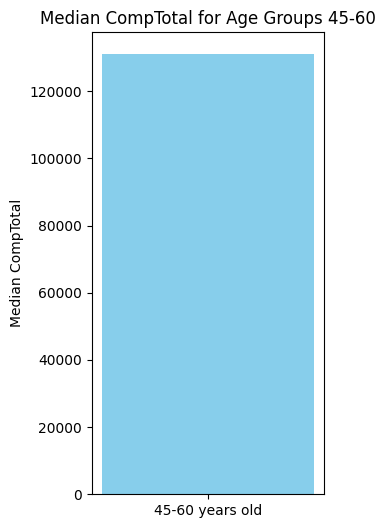

In [81]:

# Filter data for age groups between 45 and 60 years old
age_groups_of_interest = ['45-54 years old', '55-64 years old']
df_filtered = df[df['Age'].isin(age_groups_of_interest)]

# Calculate the median of 'CompTotal' directly
median_comp_total = df_filtered['CompTotal'].median()

print("Median Comp_Total:", median_comp_total)

# Fill NaN values in 'CompTotal' with the calculated median
df_filtered['CompTotal'].fillna(median_comp_total, inplace=True)

# Plot the median CompTotal
fig, ax = plt.subplots(figsize=(3, 6))

# Plot as a single bar for the median CompTotal
ax.bar(['45-60 years old'], [median_comp_total], color='skyblue')

# Add labels and title
ax.set_ylabel('Median CompTotal')
ax.set_title('Median CompTotal for Age Groups 45-60')

# Display the plot
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


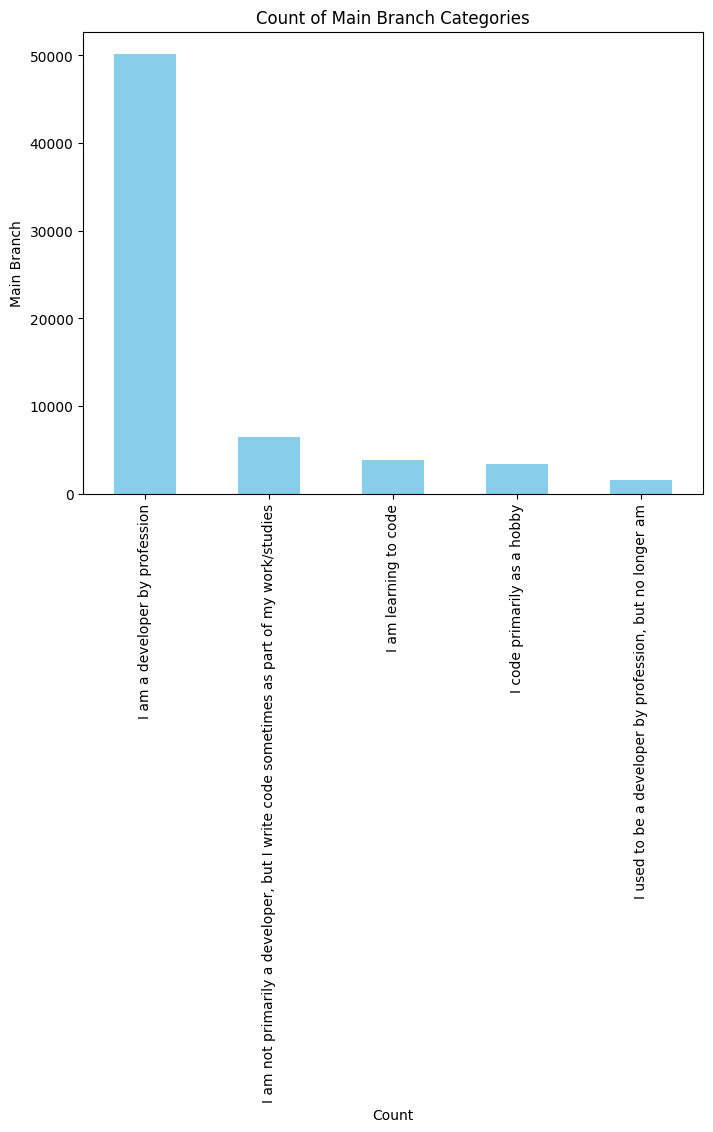

In [90]:
# Count the occurrences of each value in the 'MainBranch' column
mainbranch_counts = df['MainBranch'].value_counts()

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
mainbranch_counts.plot(kind='bar', ax=ax, color='skyblue')

# Add labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Main Branch')
ax.set_title('Count of Main Branch Categories')

# Display the plot
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
